In [7]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.ensemble as ens
import sklearn.metrics as met
import sklearn.preprocessing as pre # Modul untuk mengubah kategori menjadi numerik 0,1
import matplotlib.pyplot as plt
import seaborn as sns
from outliers import outlier
sns.set()

In [2]:
data = pd.read_csv("adult_data.csv")
data

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Mengecek RATA2

In [177]:
# data["age"].loc[data["sex_code"] == 1].mean() # Pria
# data["age"].loc[data["sex_code"] == 0].mean() # Wanita

# data["age"].loc[(data["sex_code"] == 0) & (data["age"].isnull() == True)] = 36.00
# data["age"].loc[(data["sex_code"] == 0) & (data["age"].isnull() == True)] = 36.00

In [10]:
workclass = pre.LabelEncoder()
workclass.fit(data["workclass"])
data["workclass_code"] = workclass.transform(data["workclass"])

education = pre.LabelEncoder()
education.fit(data["education"])
data["education_code"] = education.transform(data["education"])

occupation = pre.LabelEncoder()
occupation.fit(data["occupation"])
data["occupation_code"] = occupation.transform(data["occupation"])

relationship = pre.LabelEncoder()
relationship.fit(data["relationship"])
data["relationship_code"] = relationship.transform(data["relationship"])

race = pre.LabelEncoder()
race.fit(data["race"])
data["race_code"] = race.transform(data["race"])

workclass = pre.LabelEncoder()
workclass.fit(data["workclass"])
data["workclass_code"] = workclass.transform(data["workclass"])

education = pre.LabelEncoder()
education.fit(data["education"])
data["education_code"] = education.transform(data["education"])

occupation = pre.LabelEncoder()
occupation.fit(data["occupation"])
data["occupation_code"] = occupation.transform(data["occupation"])

relationship = pre.LabelEncoder()
relationship.fit(data["relationship"])
data["relationship_code"] = relationship.transform(data["relationship"])

race = pre.LabelEncoder()
race.fit(data["race"])
data["race_code"] = race.transform(data["race"])

sex = pre.LabelEncoder()
sex.fit(data["sex"])
data["sex_code"] = sex.transform(data["sex"])

native_country = pre.LabelEncoder()
native_country.fit(data["native_country"])
data["native_country_code"] = native_country.transform(data["native_country"])

income = pre.LabelEncoder()
income.fit(data["income"])
data["income_code"] = income.transform(data["income"])

In [11]:
data

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,income,workclass_code,education_code,occupation_code,relationship_code,race_code,sex_code,native_country_code,income_code
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,7,9,1,1,4,1,39,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,6,9,4,0,4,1,39,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,4,11,6,1,4,1,39,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,4,1,6,0,2,1,39,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,4,9,10,5,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,...,United-States,<=50K.,4,9,10,1,4,0,39,1
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,...,United-States,<=50K.,0,11,0,2,2,1,39,1
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,United-States,<=50K.,4,9,10,0,4,1,39,1
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,...,United-States,<=50K.,4,9,1,3,1,1,39,1


<AxesSubplot:>

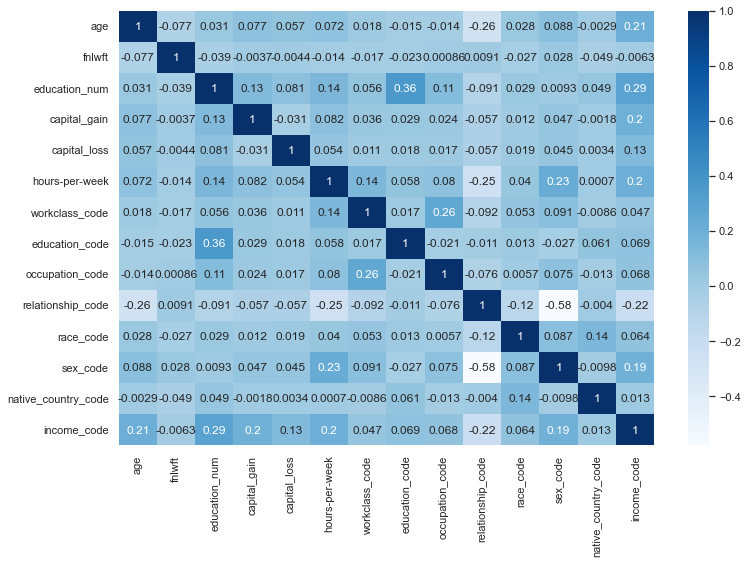

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), cmap="Blues", annot=True)

In [13]:
data.columns[15:]

Index(['workclass_code', 'education_code', 'occupation_code',
       'relationship_code', 'race_code', 'sex_code', 'native_country_code',
       'income_code'],
      dtype='object')

In [14]:
X = data.iloc[:, 16:19]
y = data["income"]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
model = ens.RandomForestClassifier(criterion="gini", max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [15]:
y_pred = model.predict(X_test)
print(y_pred)

[' <=50K' ' >50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [16]:
acc = met.accuracy_score(y_test, y_pred)
print(f"acc = {acc}")

acc = 0.5483672842665575


In [178]:
print(met.classification_report(y_test, y_pred))

a = 16
for x in range(0, len(model.feature_importances_)):
    print(f"{data.columns[a]} = {model.feature_importances_[x]}")
    a += 1

              precision    recall  f1-score   support

       <=50K       0.56      0.94      0.70      4910
      <=50K.       0.00      0.00      0.00      2498
        >50K       0.46      0.44      0.45      1555
       >50K.       0.00      0.00      0.00       806

    accuracy                           0.54      9769
   macro avg       0.25      0.35      0.29      9769
weighted avg       0.35      0.54      0.42      9769

education_code = 0.19677045091159587
occupation_code = 0.19155555791959203
relationship_code = 0.6116739911688122


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo